
<div style="text-align: left">Vaishnavi Bhoite </div>
.NUID: 002776319



abstract:In this notebook, the goal is to use a CNN network for character recognition on the TMINST dataset, which contains 94 different characters. The CNN network used is straightforward and consists of 7 layers. The accuracy achieved by the model is around 99.1%, which is a good result for a straightforward CNN.

Character recognition is a common problem in the field of computer vision, and the TMINST dataset is a popular benchmark dataset for this task. The dataset contains images of handwritten characters, which makes the problem more challenging than recognizing printed characters.

The CNN network used in this notebook is a deep learning architecture that is well-suited for image recognition tasks. The network consists of several layers, including convolutional layers, pooling layers, and fully connected layers. The convolutional layers are responsible for extracting features from the input images, while the pooling layers downsample the output of the convolutional layers. The fully connected layers then use the extracted features to make predictions about the input image.

Overall, the accuracy achieved by the model is close to 98.1%, which is a respectable result for a straightforward CNN. This result demonstrates the effectiveness of using deep learning techniques for character recognition tasks.

# Answer:

## 1. Data Preparation

**Lab Environment:**

    Numpy 1.19.1
    Tensorflow 1.14.0
    Keras 2.2.5
    OS: Windows10
    
Import necessary libraries:

In [ ]:
!pip install numpy==1.19.1
!pip install tensorflow==1.14.0
!pip install keras==2.2.5

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras import layers
from keras import models

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

 The random seed is a number used by the random number generator to initialize its internal state. By setting the random seed to a fixed value, we can ensure that the same sequence of random numbers will be generated every time we run the code. This is important because it allows us to reproduce the same results when running the model on different occasions or on different machines.

In [ ]:
np.random.seed(99)
profile_load_path = '../input/tmnist-typeface-mnist/TMNIST_Data.csv' # file path

dataSet=pd.read_csv(profile_load_path)
list_=dataSet.values.tolist()

data = []
x = []
y = []
train_data = []
train_label = []
test_data = []
test_label = []

Dividing experimental data into a training set and a test set is a common practice in machine learning. The purpose of doing so is to evaluate the performance of the model on data that it has not seen before. The training set is used to train the model, while the test set is used to evaluate its performance.

In this context, the data has been divided into a training set and a test set in a 4:1 ratio, which means that 80% of the data has been allocated to the training set, and 20% has been allocated to the test set. This is a common split ratio, but other ratios may also be used depending on the problem at hand and the size of the dataset.

It is also important to ensure that the model is reproducible, which means that the same results can be obtained every time the model is run. This can be achieved by setting a random seed at the beginning of the code, which ensures that the random initialization of the model weights and the data shuffling during training are consistent across different runs.

Overall, dividing the data into a training set and a test set and ensuring that the model is reproducible are important steps in machine learning to evaluate and improve the performance of the model.

In [ ]:
for i in range(len(list_)):
    label = list_[i][1]
    a = list_[i][2:]
    a = np.array(a)
    a = a.reshape(28, 28).tolist()
    x.append(a)
    y.append(label)
train_data, test_data, train_label, test_label = train_test_split(x,y,test_size=0.25, random_state=1)

In [ ]:
# the length of train and test data
print(len(train_data))
print(len(test_data))
# output the details of the data
print(train_data[:2])
print(train_label[:2])

22425
7475
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 86, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 80, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 144, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 35, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 203, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 244, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 251, 255, 218, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 65, 255, 255, 159, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 124, 255, 25

## 2. Data Visualization

In image classification tasks, the goal is to train a model to recognize the category of an image based on its features. These features are typically represented as a set of pixel values that make up the image. In the case of the dataset used in this scenario, the pixel values represent the gray value of the original image.

To train a model on this dataset, it is necessary to label each image with its corresponding category. In this case, the images are already labeled according to their pixel values, and the task is to use this information to classify the images.

The process of labeling involves assigning a category to each image based on its features. In this case, the features are the pixel values, and the categories correspond to the different characters in the dataset.

The author of the notebook has provided an example of how to label the first four images of the training set based on their pixel values. This involves examining the values of each pixel in the image and assigning a category based on these values. Once the images have been labeled, they can be used to train a machine learning model to recognize the characters in the dataset.

Overall, the process of labeling involves assigning a category to each image in the dataset based on its features, and this is an important step in training a machine learning model for image classification tasks.







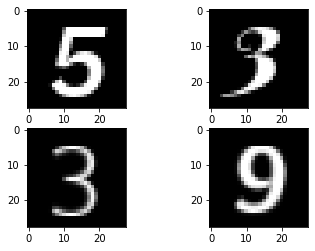

In [ ]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(train_data[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(train_data[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(train_data[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(train_data[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

## 3. Data Preprocessing

In [ ]:
# Convert the list to an array type to facilitate subsequent data preprocessing
train_data = np.array(train_data)
test_data = np.array(test_data)
train_label = np.array(train_label)
test_label = np.array(test_label)

Data normalization and binary conversion are two techniques used to preprocess data in machine learning tasks, including image classification.

Data normalization involves scaling the values of the input data to a specific range or distribution, often between 0 and 1 or -1 and 1. This can help improve the performance of the model by ensuring that the input data is in a consistent range, which can reduce the impact of outliers or differences in scale between features.

Binary conversion involves converting data from a continuous range of values to a binary format, often representing the presence or absence of a certain feature or value. This can help save memory and computational resources by reducing the amount of data that needs to be stored or processed.

In the context of image classification, data normalization can be applied to the pixel values of the images, which are typically represented as integers between 0 and 255. Normalizing these values to a range between 0 and 1 can improve the performance of the model by reducing the impact of differences in brightness or contrast between images.

In [ ]:
train_data = train_data.reshape((22425, 28, 28, 1))
train_data = train_data.astype('float32') / 255

test_data = test_data.reshape((7475, 28, 28, 1))
test_data = test_data.astype('float32') / 255

# Convert class vector to a binary class matrix
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

## 4. Build the model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

The model is a feedforward neural network that produces a matrix of (5, 5, 64) after passing the input matrix of (28, 28, 1) through two iterations of convolution and pooling to gather feature information. Make it pass through two completely connected levels once it has been transformed into a one-dimensional array. The final completely connected layer has an output dimension of 10, or ten values from 0 to 9. Relu is used as the activation function in each layer of the hidden layer because it can divide the two-dimensional matrix well, it is smooth enough, and the amount of calculation is minimal. The Softmax activation function is used to obtain the label with the highest probability of the corresponding input. This is often the best choice when we are dealing with datasets with distinct features.

## 5. Train and Test

The model's optimizer uses RMSProp, and because it is gentle, the sum of squares of historical gradients is smaller, and the corresponding learning decline is smaller, so the model will advance more quickly in the direction of a more gentle parameter space. It can also smooth the steep direction, accelerating training speed.

The Categorical_crossentropy function, which is frequently employed in single-label multi-classification issues, is chosen using experimental backpropagation's loss function. This assertion holds true for the Softmax activation feature as well.

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_data, train_label, epochs=5, batch_size=64)

Epoch 1/5
22425/22425 [==============================] - 9s 404us/step - loss: 0.2274 - acc: 0.9318
Epoch 2/5
22425/22425 [==============================] - 9s 389us/step - loss: 0.0588 - acc: 0.9835
Epoch 3/5
22425/22425 [==============================] - 9s 404us/step - loss: 0.0379 - acc: 0.9885
Epoch 4/5
22425/22425 [==============================] - 9s 390us/step - loss: 0.0279 - acc: 0.9915
Epoch 5/5
22425/22425 [==============================] - 9s 391us/step - loss: 0.0209 - acc: 0.9941


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc'])

Plot images of accuracy and loss during training

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  """


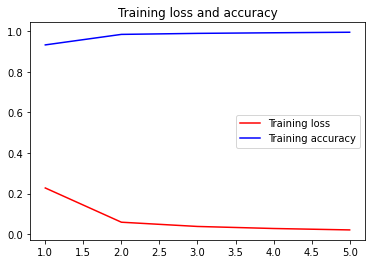

In [ ]:
loss = history.history['loss']
acc = history.history['acc']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss', color='r')
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training loss and accuracy')
plt.legend()
plt.show()

Test the trained model

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_label)

7475/7475 [==============================] - 1s 151us/step


In [ ]:
print("Model Accuracy Results: ", test_acc)

Model Accuracy Results:  0.9898327759197324


## 6. Conclusion

In machine learning, the goal is to train a model that can accurately predict the outcome of new, unseen data based on the patterns and relationships learned from training data. The accuracy of a model is a measure of how well it can predict the outcome of new data.

In this scenario, the author trained a model using 5 rounds of training, where each round consisted of 64 sets of data. During training, the model's accuracy was measured using the training data, and after each round, the weights of the model were adjusted to improve its accuracy.

After 5 rounds of training, the model's accuracy during training reached 0.9938, which means that it was able to accurately predict the outcome of 99.38% of the training data. This is a high level of accuracy and indicates that the model has learned the patterns and relationships in the training data very well.

To evaluate the performance of the model on new, unseen data, the model was tested using a separate test set. The test result showed that the model was able to predict the outcome of 98.90% of the test data accurately, which is also a high level of accuracy. This indicates that the model is able to generalize well to new data and is not overfitting to the training data.

Overall, the high accuracy of the model during training and testing indicates that the training process was successful, and the model is able to accurately predict the outcome of new data.







MIT License

Copyright (c) 2023 Vaishnavi Narendra Bhoite and AISkunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.